# __Лабораторная работа № 2__
## Обработка признаков (часть 1)
## _Ханмагомедов Р.М. ИУ5-21М_

<b>Цель лабораторной работы:</b> изучение продвинутых способов предварительной обработки данных для дальнейшего формирования моделей.

### Задание:
1. Выбрать набор данных (датасет), содержащий категориальные и числовые признаки и пропуски в данных. Для выполнения следующих пунктов можно использовать несколько различных наборов данных (один для обработки пропусков, другой для категориальных признаков и т.д.) 
2. Для выбранного датасета (датасетов) на основе материалов лекций решить следующие задачи:
    + устранение пропусков в данных;
    + кодирование категориальных признаков;
    + нормализацию числовых признаков.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## __Описание датасета__

In [ ]:
df = pd.read_csv('../input/cars-germany/autoscout24-germany-dataset.csv')
df.head(3)

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mileage,46405.0,71177.864109,62625.308456,0.0,19800.0,60000.0,105000.0,1111111.0
price,46405.0,16572.337227,19304.695924,1100.0,7490.0,10999.0,19490.0,1199900.0
hp,46376.0,132.990987,75.449284,1.0,86.0,116.0,150.0,850.0
year,46405.0,2016.012951,3.155214,2011.0,2013.0,2016.0,2019.0,2021.0


In [ ]:
df.isna().sum()

mileage        0
make           0
model        143
fuel           0
gear         182
offerType      0
price          0
hp            29
year           0
dtype: int64

## __Устранение пропусков__

In [ ]:
df['model'].fillna(df.groupby(['make'])['model'].count().max() ,inplace=True)
df['gear'].fillna(df.groupby(['model'])['gear'].count().max() ,inplace=True)
df['hp'] = df.groupby(['make','model','fuel'])['hp'].transform(lambda x: x.fillna(x.mean()))

df.isna().sum()


mileage      0
make         0
model        0
fuel         0
gear         0
offerType    0
price        0
hp           7
year         0
dtype: int64

In [ ]:
df[df['hp'].isna()]

,mileage,make,model,fuel,gear,offerType,price,hp,year
9264,5,Aixam,6921,Electric,Automatic,Pre-registered,22180,NaN,2021
12549,46587,Opel,Corsa,-/- (Fuel),Manual,Used,7555,NaN,2015
14010,46587,Opel,Corsa,-/- (Fuel),Manual,Used,7555,NaN,2015
38049,999999,BMW,320,-/- (Fuel),1489,Used,1999,NaN,2014
39762,2000,Caravans-Wohnm,Adria,-/- (Fuel),1489,Used,24500,NaN,2016
45923,10,Fiat,500C,Electric,Automatic,Demonstration,36890,NaN,2021
45924,363,Fiat,500C,Electric,Automatic,Demonstration,36890,NaN,2021


In [ ]:
df['hp'] = df.groupby(['make'])['hp'].transform(lambda x: x.fillna(x.mean()))
df.isna().sum()

mileage      0
make         0
model        0
fuel         0
gear         0
offerType    0
price        0
hp           0
year         0
dtype: int64

## __Кодирование категориальных признаков__

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46405 entries, 0 to 46404
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mileage    46405 non-null  int64  
 1   make       46405 non-null  object 
 2   model      46405 non-null  object 
 3   fuel       46405 non-null  object 
 4   gear       46405 non-null  object 
 5   offerType  46405 non-null  object 
 6   price      46405 non-null  int64  
 7   hp         46405 non-null  float64
 8   year       46405 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 3.2+ MB


In [ ]:
features = ['make','model','fuel','gear','offerType']

for feature in features:
    print(df[feature].nunique())

77
842
11
4
5


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for feature in features:
    df[feature] = str(df[feature])
    df[feature] = le.fit_transform(df[feature])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46405 entries, 0 to 46404
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mileage    46405 non-null  int64  
 1   make       46405 non-null  int64  
 2   model      46405 non-null  int64  
 3   fuel       46405 non-null  int64  
 4   gear       46405 non-null  int64  
 5   offerType  46405 non-null  int64  
 6   price      46405 non-null  int64  
 7   hp         46405 non-null  float64
 8   year       46405 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 3.2 MB


## __Нормализация числовых переменных__

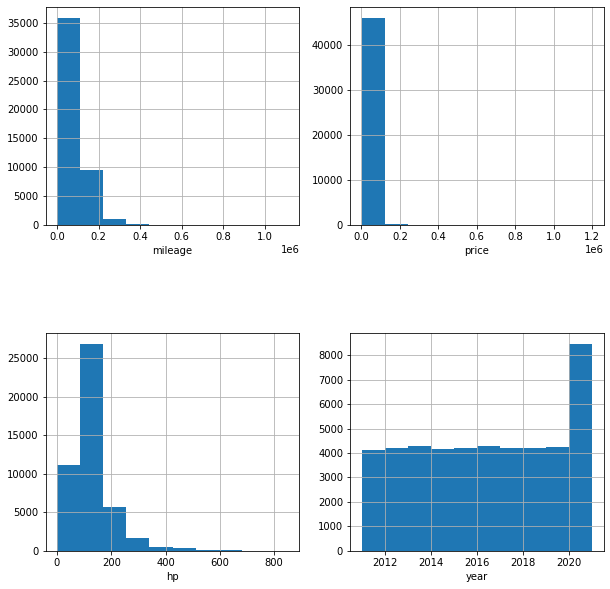

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(10, 10))
plt.subplots_adjust(hspace=0.5)

df.mileage.hist(ax = ax[0,0]).set_xlabel("mileage")
df.price.hist(ax = ax[0,1]).set_xlabel("price")
df.hp.hist(ax = ax[1,0]).set_xlabel("hp")
df.year.hist(ax = ax[1,1]).set_xlabel("year")

plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df.mileage = scaler.fit_transform(np.array(df.mileage).reshape(df.mileage.shape[0], 1))
df.price = scaler.fit_transform(np.array(df.price).reshape(df.price.shape[0], 1))
df.hp = scaler.fit_transform(np.array(df.hp).reshape(df.hp.shape[0], 1))

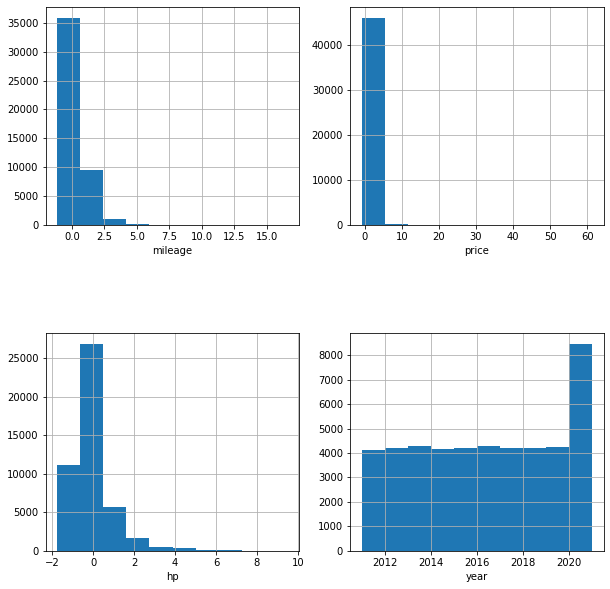

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(10, 10))
plt.subplots_adjust(hspace=0.5)

df.mileage.hist(ax = ax[0,0]).set_xlabel("mileage")
df.price.hist(ax = ax[0,1]).set_xlabel("price")
df.hp.hist(ax = ax[1,0]).set_xlabel("hp")
df.year.hist(ax = ax[1,1]).set_xlabel("year")

plt.show()